# Exercice 1 

# Question 1 : 

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
#1
#a
df = pd.read_csv("/users/2024/ds2/121009626/Téléchargements/spam7.csv", sep=';')
df

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [8]:
#b
y = df['yesno']
X =  df.loc[:,[ 'crl.tot','dollar','bang','money','n000','make']]
X

,crl.tot,dollar,bang,money,n000,make
0,278,0.000,0.778,0.00,0.00,0.00
1,1028,0.180,0.372,0.43,0.43,0.21
2,2259,0.184,0.276,0.06,1.16,0.06
3,191,0.000,0.137,0.00,0.00,0.00
4,191,0.000,0.135,0.00,0.00,0.00
...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31
4597,14,0.000,0.353,0.00,0.00,0.00
4598,118,0.000,0.000,0.00,0.00,0.30
4599,78,0.000,0.000,0.00,0.00,0.96


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # echantillon test toujours plus petit que l'entrainement

In [26]:
#c
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")

Précision du modèle : 0.8478922207735767


In [27]:
#d
pro_pred =clf.predict_proba(X_test)
for i, score in enumerate(pro_pred):
    print(f"Individu {i+1} - Score de la classe 0: {score[0]}, Score de la classe 1: {score[1]}")

Individu 1 - Score de la classe 0: 0.0, Score de la classe 1: 1.0
Individu 2 - Score de la classe 0: 0.8669354838709677, Score de la classe 1: 0.13306451612903225
Individu 3 - Score de la classe 0: 0.8669354838709677, Score de la classe 1: 0.13306451612903225
Individu 4 - Score de la classe 0: 0.8669354838709677, Score de la classe 1: 0.13306451612903225
Individu 5 - Score de la classe 0: 0.5617977528089888, Score de la classe 1: 0.43820224719101125
Individu 6 - Score de la classe 0: 0.8669354838709677, Score de la classe 1: 0.13306451612903225
Individu 7 - Score de la classe 0: 0.09523809523809523, Score de la classe 1: 0.9047619047619048
Individu 8 - Score de la classe 0: 0.061224489795918366, Score de la classe 1: 0.9387755102040817
Individu 9 - Score de la classe 0: 0.09523809523809523, Score de la classe 1: 0.9047619047619048
Individu 10 - Score de la classe 0: 0.8484848484848485, Score de la classe 1: 0.15151515151515152
Individu 11 - Score de la classe 0: 0.0, Score de la classe

In [32]:
#e 
train_score = clf.score(X_train,y_train)
print(f"score d'entrainement : {train_score}")

test_score = clf.score(X_test,y_test)
print(f"score de test : {test_score}")


score d'entrainement : 0.8626086956521739
score de test : 0.8478922207735767


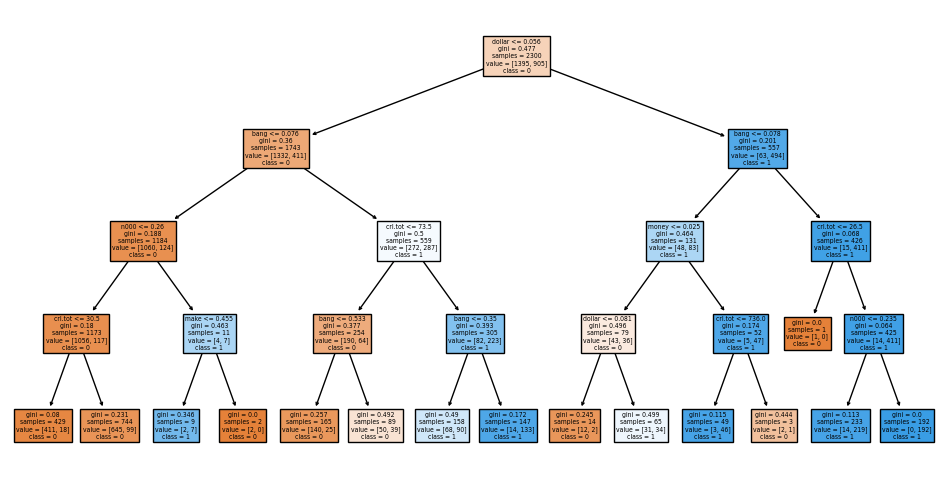

In [28]:
#f
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.show()


In [37]:
#g
# Définir les paramètres pour la recherche
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 3, 4],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.1, 0.2]
}


# recherche du meilleur estimateur
grid_search = GridSearchCV(clf, param_grid)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_ # meilleurs paramètres
best_score = grid_search.best_score_ # meilleure score

# Utiliser le meilleur estimateur pour prédire sur l'ensemble de test
best_clf = grid_search.best_estimator_
y_pred_train = best_clf.predict(X_train)
y_pred_test = best_clf.predict(X_test)


train_accuracy = accuracy_score(y_train, y_pred_train) # erreur d'entrainement = 1 - train_accuracy
test_accuracy = accuracy_score(y_test, y_pred_test) # erreur test = 1 - test_accuracy

# Afficher les résultats
print("Meilleurs paramètres :", best_params)
print("Meilleur score lors de la validation croisée :", best_score)
print("Erreur d'entraînement :", train_accuracy)
print("Erreur de test :", test_accuracy)


Meilleurs paramètres : {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3}
Meilleur score lors de la validation croisée : 0.8591304347826088
Erreur d'entraînement : 0.8804347826086957
Erreur de test : 0.8665797479356802


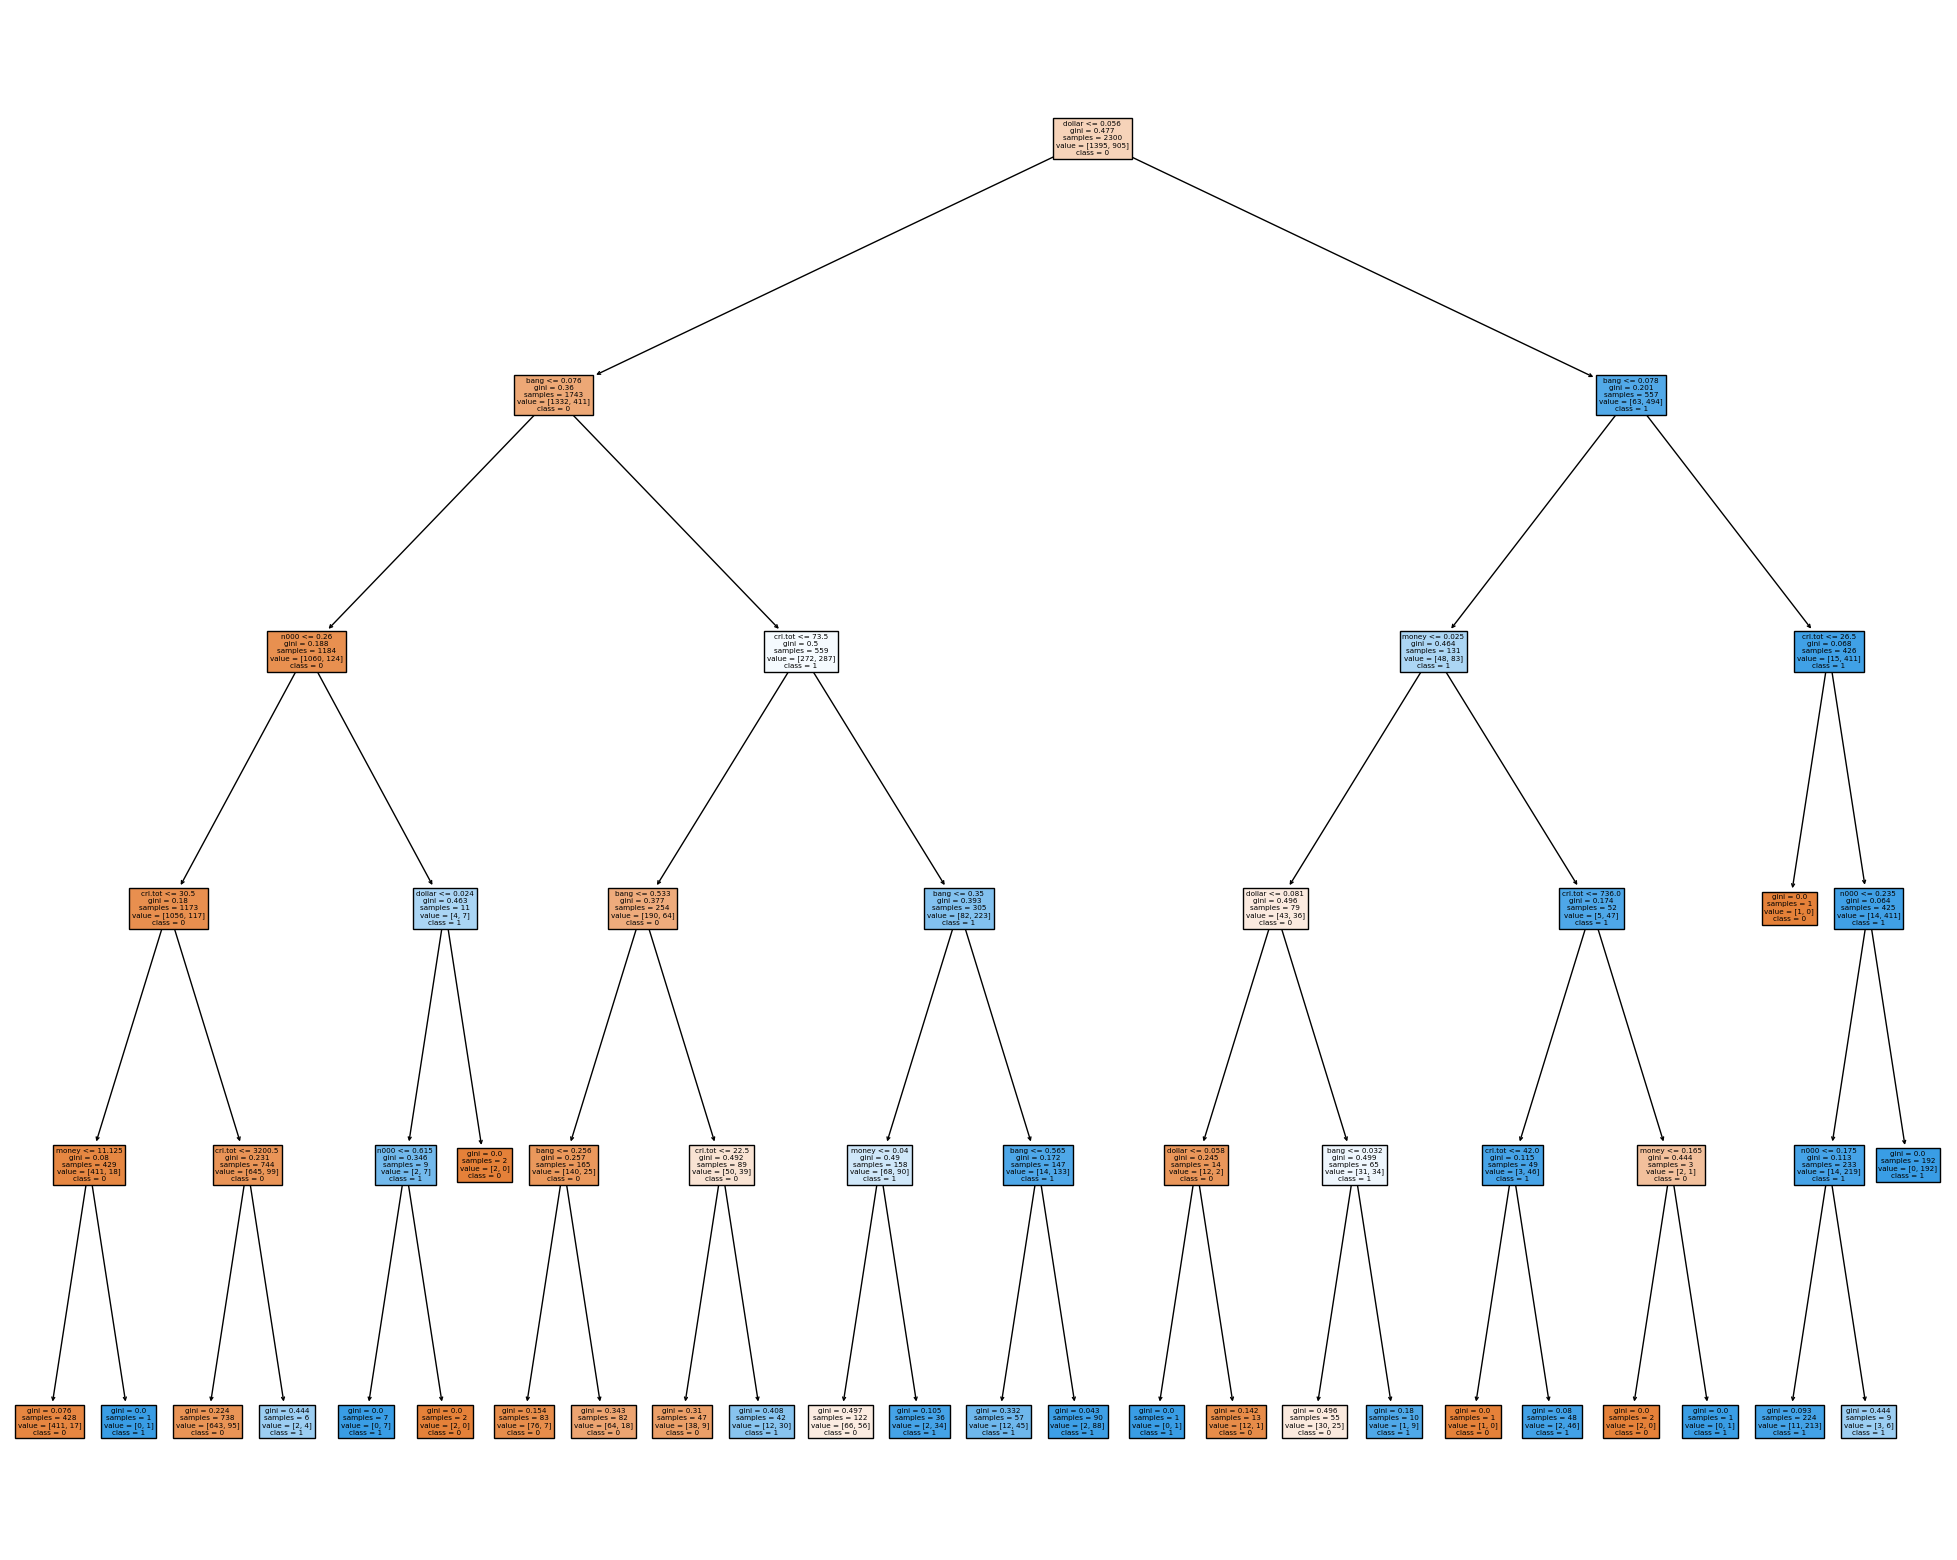

In [38]:
#h
clf_opt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2,ccp_alpha=0.0)
clf_opt.fit(X_train, y_train)
plt.figure(figsize=(25, 20))
plot_tree(clf_opt, feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.show()

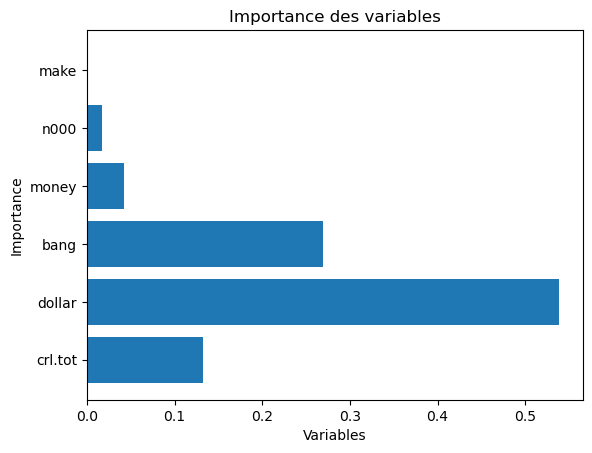

In [41]:
#i
var_import = clf_opt.feature_importances_
features = X.columns
plt.barh(features,var_import)
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.show()

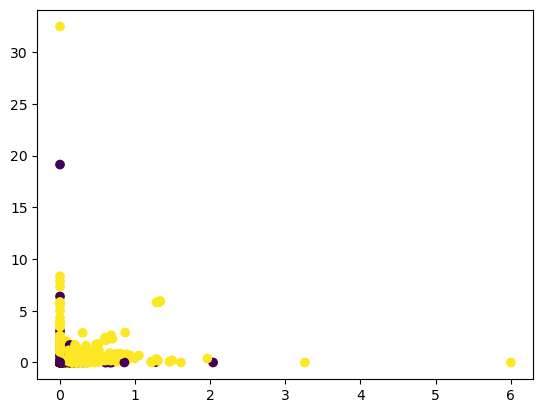

In [50]:
#j
import numpy as np
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_numeric = np.where(y_pred == 'y', 1, 0)
#y_pred = clf.predict(X_test)
plt.scatter(X_test["dollar"],X_test["bang"], c= y_pred_numeric ,cmap='viridis', label='Prédiction')
plt.show()

# Question 2: Bagging

In [52]:
#a
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

bagging_clf = BaggingClassifier()

# Entraîner le modèle sur l'ensemble d'entraînement
bagging_clf.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y1_pred = bagging_clf.predict(X_test)

# Calculer la précision des prédictions
accuracy = accuracy_score(y_test, y1_pred)
print(f"Précision du modèle de bagging : {accuracy}")


Précision du modèle de bagging : 0.8722843976300197


In [53]:
# b
bagging_clf = BaggingClassifier(oob_score= True)
bagging_clf.fit(X_train, y_train)
y1_pred_test = bagging_clf.predict(X_test)

oob_error = 1 - bagging_clf.oob_score_
print("Erreur oob :", oob_error)

test_accuracy_bag = accuracy_score(y_test, y1_pred_test) # score test
err_test = 1 - test_accuracy_bag
print("Erreur de test :", err_test)

Erreur oob : 0.15087605451005837
Erreur de test : 0.12969058591178406


/usr/lib64/python3.11/site-packages/sklearn/ensemble/_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/lib64/python3.11/site-packages/sklearn/ensemble/_bagging.py:753: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [ ]:
# c utilise gridsearchcv
clf 